---
title: Fabry-Perot Cavities and Laser Oscillators
date: 2025-01-26
authors:
  - name: Craig Cahillane
    orcid: 0000-0002-3888-314X
    affiliations:
      - Syracuse University
numbering:
  heading_1: true
  heading_2: true
  heading_3: true
---

A Fabry-Perot two-mirror optical cavity is the fundamental building block of laser physics.
With it, we have built the first lasers and masers,
created optical clocks
and detected gravitational waves.

Here we will dive deeply into the basics of a Fabry-Perot.
We will come back to this formalism a dozen times throughout this course, 
and develop some matrix mechanics and other math required to understand it.

In [4]:
#| "tags": [ "hide-input",]
%matplotlib widget
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
from ipywidgets import *

plt.style.use('dark_background')

fontsize = 14
mpl.rcParams.update(
    {
        "text.usetex": False,
        "figure.figsize": (9, 6),
        # "figure.autolayout": True,
        # "font.family": "serif",
        # "font.serif": "georgia",
        # 'mathtext.fontset': 'cm',
        "lines.linewidth": 1.5,
        "font.size": fontsize,
        "xtick.labelsize": fontsize,
        "ytick.labelsize": fontsize,
        "legend.fancybox": True,
        "legend.fontsize": fontsize,
        "legend.framealpha": 0.7,
        "legend.handletextpad": 0.5,
        "legend.labelspacing": 0.2,
        "legend.loc": "best",
        "axes.edgecolor": "#b0b0b0",
        "grid.color": "#707070",  # grid color"
        "xtick.color": "#b0b0b0",
        "ytick.color": "#b0b0b0",
        "savefig.dpi": 80,
        "pdf.compression": 9,
    }
)

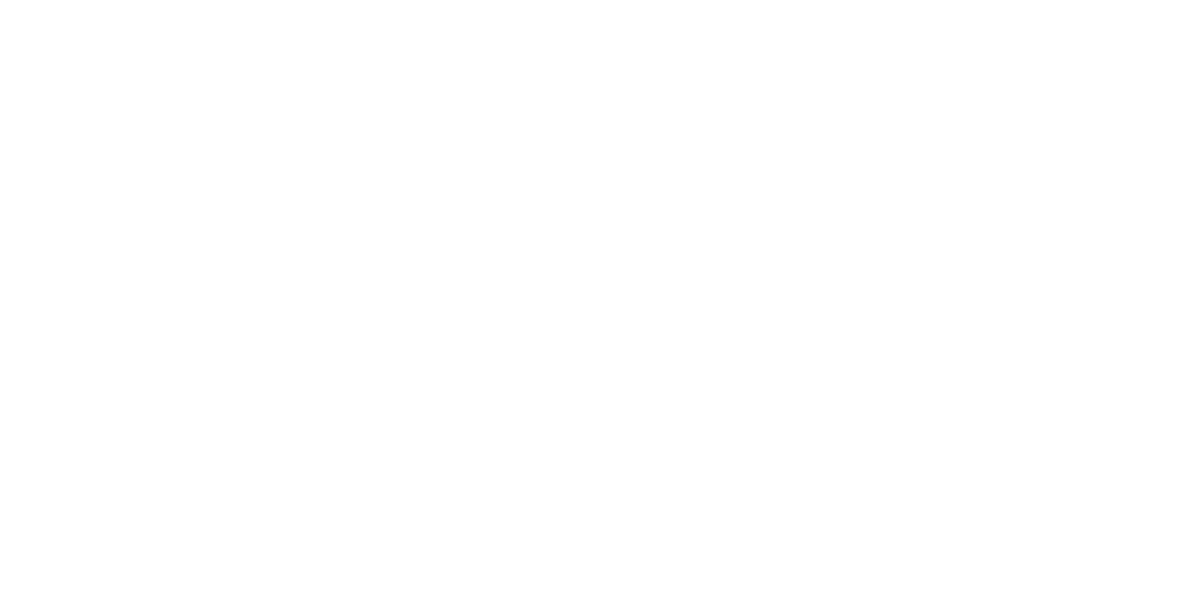

In [6]:
#| "tags": [ "hide-input",]
import matplotlib.patches as patches
from matplotlib.patches import FancyArrowPatch, Rectangle
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Parameters
cavity_length = 6
mirror_height = 2
beam_width = 0.15
mirror_x1 = 0
mirror_x2 = cavity_length

# Draw Mirror 1 (left) - partially reflecting
ax.plot([mirror_x1, mirror_x1], [-mirror_height/2, mirror_height/2], 
        color='darkblue', linewidth=4, solid_capstyle='butt')
# Add semi-transparent layer to show partial reflection
ax.plot([mirror_x1-0.05, mirror_x1-0.05], [-mirror_height/2, mirror_height/2], 
        color='steelblue', linewidth=2, alpha=0.5, solid_capstyle='butt')
ax.text(mirror_x1, -mirror_height/2-0.3, 'Mirror 1 ($R_1$)', 
        ha='center', fontsize=12)

# Draw Mirror 2 (right) - partially reflecting
ax.plot([mirror_x2, mirror_x2], [-mirror_height/2, mirror_height/2], 
        color='darkblue', linewidth=4, solid_capstyle='butt')
# Add semi-transparent layer
ax.plot([mirror_x2+0.05, mirror_x2+0.05], [-mirror_height/2, mirror_height/2], 
        color='steelblue', linewidth=2, alpha=0.5, solid_capstyle='butt')
ax.text(mirror_x2, -mirror_height/2-0.3, 'Mirror 2 ($R_2$)', 
        ha='center', fontsize=12)

# Input beam (from left)
input_y = 0
arrow1 = FancyArrowPatch((-2, input_y), (-0.05, input_y),
                        arrowstyle='->', mutation_scale=20, 
                        linewidth=2.5, color='crimson')
ax.add_patch(arrow1)
# Beam profile
beam_rect1 = Rectangle((-2, input_y-beam_width), 1.95, 2*beam_width, 
                       facecolor='red', alpha=0.3, edgecolor='none')
ax.add_patch(beam_rect1)
ax.text(-1, input_y+0.25, 'Input beam', fontsize=11, color='crimson', 
        ha='center', weight='bold')

# Reflected beam (bouncing back from Mirror 1)
reflected_y = -0.4
arrow2 = FancyArrowPatch((-0.05, reflected_y), (-2, reflected_y),
                        arrowstyle='->', mutation_scale=20, 
                        linewidth=2.5, color='darkorange')
ax.add_patch(arrow2)
# Beam profile
beam_rect2 = Rectangle((-2, reflected_y-beam_width), 1.95, 2*beam_width, 
                       facecolor='orange', alpha=0.3, edgecolor='none')
ax.add_patch(beam_rect2)
ax.text(-1, reflected_y-0.25, 'Reflected beam', fontsize=11, 
        color='darkorange', ha='center', weight='bold')

# Transmitted beam (exiting from Mirror 2)
transmitted_y = 0
arrow3 = FancyArrowPatch((cavity_length+0.05, transmitted_y), 
                        (cavity_length+2, transmitted_y),
                        arrowstyle='->', mutation_scale=20, 
                        linewidth=2.5, color='royalblue')
ax.add_patch(arrow3)
# Beam profile
beam_rect3 = Rectangle((cavity_length+0.05, transmitted_y-beam_width), 
                       1.95, 2*beam_width, 
                       facecolor='blue', alpha=0.3, edgecolor='none')
ax.add_patch(beam_rect3)
ax.text(cavity_length+1, transmitted_y+0.25, 'Transmitted beam', 
        fontsize=11, color='royalblue', ha='center', weight='bold')

# Internal cavity field (showing multiple reflections)
cavity_y1 = 0.3
cavity_y2 = -0.7
ax.plot([0.05, cavity_length-0.05], [cavity_y1, cavity_y1], 
        '--', color='green', linewidth=1.5, alpha=0.7)

# Bidirectional arrow for cavity mode
arrow4 = FancyArrowPatch((0.05, cavity_y2), (cavity_length-0.05, cavity_y2),
                        arrowstyle='<->', mutation_scale=15, 
                        linewidth=1.5, color='green', linestyle='--', alpha=0.7)
ax.add_patch(arrow4)
ax.text(cavity_length/2, cavity_y2-0.25, 'Cavity mode', 
        fontsize=10, color='green', ha='center', style='italic')

# Add some internal reflections (artistic representation)
num_reflections = 6
for i in range(num_reflections):
    x_start = 0.1 + i * (cavity_length-0.2) / num_reflections
    x_end = x_start + 0.5 * (cavity_length-0.2) / num_reflections
    arrow_refl = FancyArrowPatch((x_start, 0.15), (x_end, 0.15),
                                arrowstyle='->', mutation_scale=10, 
                                linewidth=1, color='green', alpha=0.4)
    ax.add_patch(arrow_refl)

# Cavity length annotation
ax.annotate('', xy=(cavity_length, mirror_height/2+0.5), 
            xytext=(0, mirror_height/2+0.5),
            arrowprops=dict(arrowstyle='<->', color='black', lw=1))
ax.text(cavity_length/2, mirror_height/2+0.7, 'Cavity length $L$', 
        ha='center', fontsize=12)

# Set axis properties
ax.set_xlim(-2.5, cavity_length+2.5)
ax.set_ylim(-1.5, 1.8)
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
# plt.savefig('/mnt/user-data/outputs/fabry_perot_matplotlib.png', 
#             dpi=300, bbox_inches='tight', facecolor='white')
# plt.savefig('/mnt/user-data/outputs/fabry_perot_matplotlib.pdf', 
#             bbox_inches='tight', facecolor='white')
plt.show()